<a href="https://colab.research.google.com/github/Moshikaa/Liner-Regression-using-multiple-variable/blob/main/LR2_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Download data
medical_charges_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [27]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'insurance.csv')

('insurance.csv', <http.client.HTTPMessage at 0x7eb15970dc60>)

In [28]:
#Create pandas data frame to analyse data
!pip install pandas --quiet
import pandas as pd
insurance_df=pd.read_csv('insurance.csv')

In [29]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
#Create dummy variables to categorical data
gender=pd.get_dummies(insurance_df['sex'])
gender.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
#Create dummy for smoker
smoking=pd.get_dummies(insurance_df['smoker'])
smoking.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
regions=pd.get_dummies(insurance_df['region'])
regions.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [36]:
insurance_df=pd.concat([insurance_df, gender, smoking, regions], axis=1)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [58]:
insurance_df=insurance_df.drop(['sex', 'smoker','region'], axis=1)

In [ ]:
#We can see that there are no categorical variables left.

In [59]:
#Linear Regression with multiple variables
insurance_df.corr

<bound method DataFrame.corr of       age     bmi  children      charges  female  male  no  yes  northeast  \
0      19  27.900         0  16884.92400       1     0   0    1          0   
1      18  33.770         1   1725.55230       0     1   1    0          0   
2      28  33.000         3   4449.46200       0     1   1    0          0   
3      33  22.705         0  21984.47061       0     1   1    0          0   
4      32  28.880         0   3866.85520       0     1   1    0          0   
...   ...     ...       ...          ...     ...   ...  ..  ...        ...   
1333   50  30.970         3  10600.54830       0     1   1    0          0   
1334   18  31.920         0   2205.98080       1     0   1    0          1   
1335   18  36.850         0   1629.83350       1     0   1    0          0   
1336   21  25.800         0   2007.94500       1     0   1    0          0   
1337   61  29.070         0  29141.36030       1     0   0    1          0   

      northwest  southeast  sou

<ipython-input-52-24fc6474c0c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_df.corr(), cmap='Reds', annot=True, linewidths=2, square=True, cbar_kws={"shrink": 0.75})


Text(0.5, 1.0, 'Correlation Matrix')

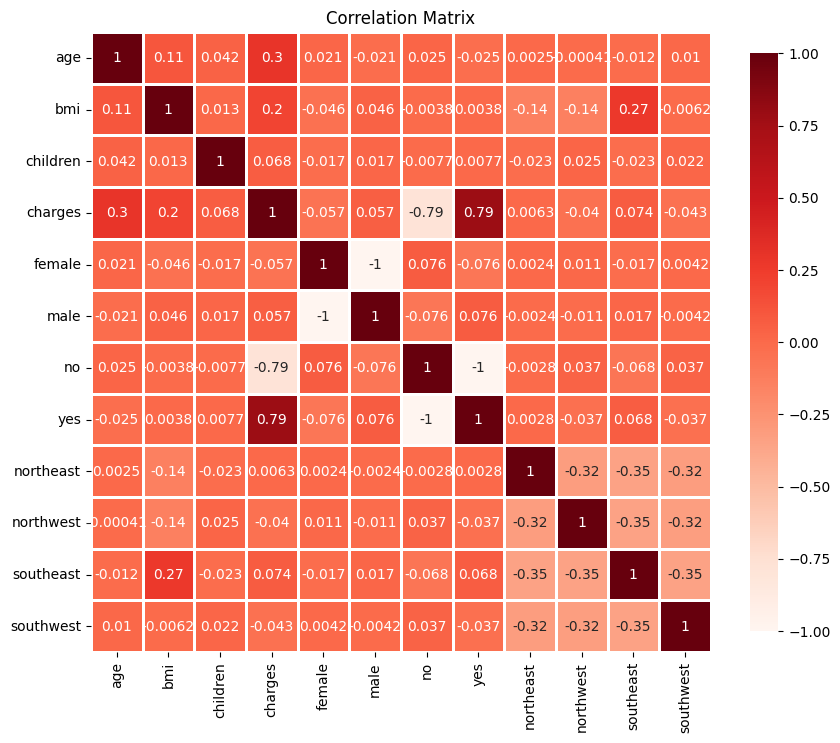

In [52]:
#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)). #always introsize size of plot first
sns.heatmap(insurance_df.corr(), cmap='Reds', annot=True, linewidths=2, square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Matrix")

In [ ]:
#We can see that the corr is highest for charges with smoker=yes, age and bmi
# Hence these three be the features
# y=m1*x1 + m2*x2 + m3*x3 + b


In [60]:
insurance_df

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [68]:
smoker_df=insurance_df[insurance_df.yes == 1]
smoker_df=smoker_df.drop('no', axis=1)
smoker_df.head()

,age,bmi,children,charges,female,male,yes,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.9240,1,0,1,0,0,0,1
11,62,26.29,0,27808.7251,1,0,1,0,0,1,0
14,27,42.13,0,39611.7577,0,1,1,0,0,1,0
19,30,35.30,0,36837.4670,0,1,1,0,0,0,1
23,34,31.92,1,37701.8768,1,0,1,1,0,0,0


In [ ]:
#Now we only have charges values for smokers. Hence the no of features is reduced to two, ie age and bmi.
#y= age*m1 + bmi*m2 + b


In [77]:
#Loss/Cost function
import numpy as np
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))


In [79]:
#Linear Regression with Multiple Features:

# 1. define parametes
inputs=smoker_df[['age','bmi']]
targets=smoker_df['charges']

# 2. define model
!pip install scikit-learn --quiet
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(inputs, targets)

# 3.define output
predictions=model.predict(inputs)

# 4.loss/cost function
loss=rmse(targets,predictions)
print(loss)

5722.782238884455


In [80]:
model.coef_.  #values of m1, m2

array([ 266.29222371, 1438.09098289])

In [81]:
model.intercept_

-22367.449727751275

In [87]:
#Plot graph to show best fit
m1=266.29222371
m2=1438.09098289
b=-22367.449727751275
ages=smoker_df.age
bmi=smoker_df.bmi
target=smoker_df.charges

In [85]:
import plotly.express as px
import matplotlib.pyplot as plt

In [90]:
#define two functions, ie estimated charge and try_parameters
def estimated_charges(age,m1,bmi,m2,b):
  return age*m1+bmi*m2+b
def try_parameter(m1,m2,b):
  predictions=estimated_charges(ages,m1,bmi,m2,b)
  fig = px.scatter_3d(smoker_df, x='age', y='bmi', z='charges'). #3D plot is used for LR with two variables
  fig.update_traces(marker_size=3, marker_opacity=0.5)
  fig.show()
  loss=rmse(target,predictions)
  print(loss)

estimated_charges(ages,m1,bmi,m2,b)
try_parameter(m1,m2,b)

5722.782238884456


In [ ]:
#you have to note that you cannot create individual subplots for these kind of LR prblms. This is because in order to
#show the fit, you need to have estimated_charges function written for age and bmi seperaely, which makes the entire
#LR pblm meaningless since both of them together have to be considered.